# Floodscan Benue

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from src.datasources import floodscan, codab, hydrosheds
from src.constants import *

In [3]:
benue = hydrosheds.load_benue_aoi()

In [4]:
adm2 = codab.load_codab(admin_level=2)
adm2_a = adm2[adm2["ADM1_PCODE"] == ADAMAWA]
adm2_a_pcodes = adm2_a["ADM2_PCODE"].unique()

<Axes: >

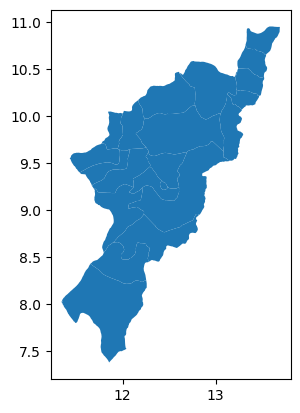

In [5]:
adm2_a.plot()

In [6]:
df = floodscan.load_adm2_daily_rasterstats()
df = df[df["ADM2_PCODE"].isin(adm2_a_pcodes)]

In [7]:
year_mean = df.groupby(df["time"].dt.year)["SFED_AREA"].mean().reset_index()

In [8]:
year_mean

,time,SFED_AREA
0,1998,0.001741
1,1999,0.003195
2,2000,0.000986
3,2001,0.000590
4,2002,0.000845
5,2003,0.001371
6,2004,0.000281
7,2005,0.000725
8,2006,0.001092
9,2007,0.001169


In [9]:
df_max_adm2 = df.groupby("ADM2_PCODE")["SFED_AREA"].max().reset_index()

In [10]:
BENUE_ADM2_PCODES = ["NG002016", "NG002009", "NG002021", "NG002005"]

In [11]:
adm2_a[adm2_a["ADM2_PCODE"].isin(BENUE_ADM2_PCODES)]

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,SD_EN,SD_PCODE,geometry
243,1.478029,0.098248,Girei,NG002005,Girei,None,None,Adamawa,NG002,Nigeria,NG,2016-11-29,2019-04-17,None,Adamawa Central,NG00201,"POLYGON ((12.69195 9.61159, 12.69103 9.60983, ..."
462,1.420854,0.091071,Lamurde,NG002009,Lamurde,None,None,Adamawa,NG002,Nigeria,NG,2016-11-29,2019-04-17,None,Adamawa South,NG00203,"POLYGON ((11.94601 9.64977, 11.94758 9.64862, ..."
541,1.602772,0.068704,Numan,NG002016,Numan,None,None,Adamawa,NG002,Nigeria,NG,2016-11-29,2019-04-17,None,Adamawa South,NG00203,"POLYGON ((11.67054 9.25311, 11.67016 9.25361, ..."
763,1.657038,0.076612,Yola South,NG002021,Yola South,None,None,Adamawa,NG002,Nigeria,NG,2016-11-29,2019-04-17,None,Adamawa Central,NG00201,"POLYGON ((12.29251 9.45926, 12.29620 9.45652, ..."


(11.223985950400055, 13.809760121600045, 7.200126286100025, 11.128001025900025)

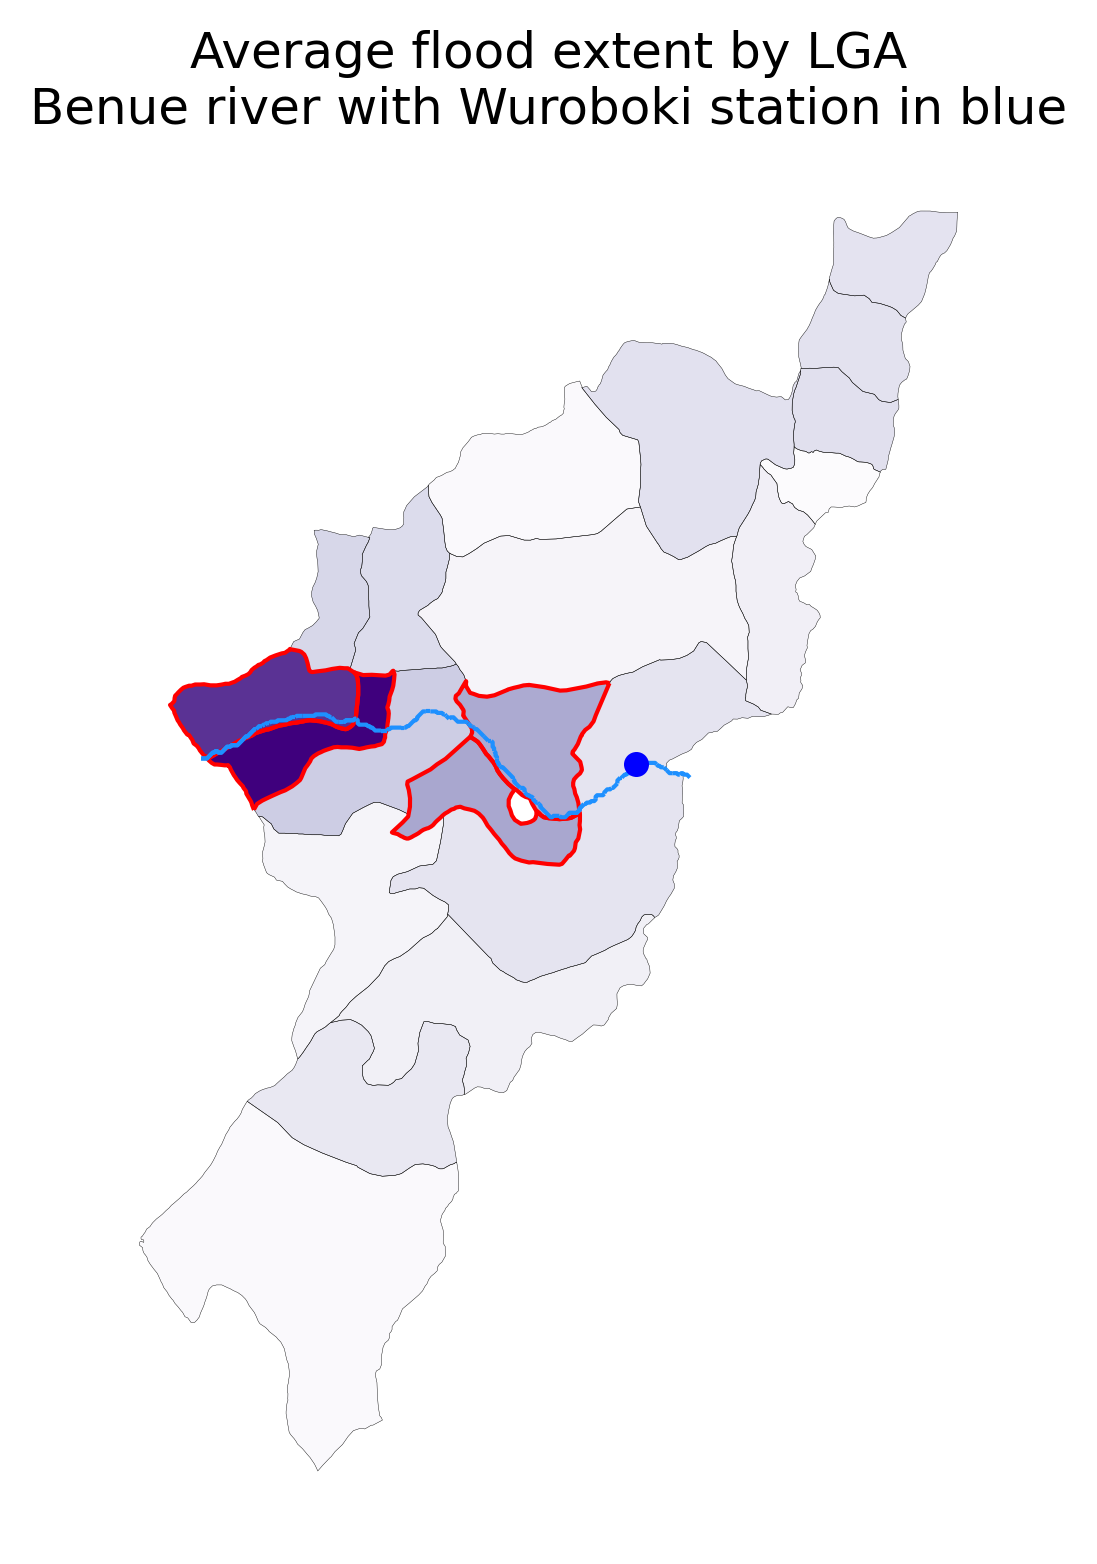

In [12]:
fig, ax = plt.subplots(dpi=300, figsize=(6, 6))
adm2_a.merge(df_max_adm2).plot(column="SFED_AREA", cmap="Purples", ax=ax)
adm2_a.boundary.plot(linewidth=0.1, color="k", ax=ax)
adm2_a[adm2_a["ADM2_PCODE"].isin(BENUE_ADM2_PCODES)].boundary.plot(
    linewidth=1,
    color="red",
    ax=ax,
)
benue.plot(ax=ax, color="dodgerblue", linewidth=1)
ax.plot([12.767], [9.383], marker=".", color="blue", markersize=10)
ax.set_title(
    "Average flood extent by LGA\nBenue river with Wuroboki station in blue"
)
ax.axis("off")